# ***Movies Recommender System***

In this notebook, I will attempt at implementing a few recommendation algorithms (content based, popularity based and collaborative filtering) and try to build an ensemble of these models to come up with our final recommendation system.


### *Importing Libraries*

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import seaborn as sns
import ast
import pickle

### *Reading Dataset*

In [2]:
# Reading Movies_dataset
try:
    movies_df = pd.read_csv('movies_metadata.csv',on_bad_lines='skip')
except Exception as e:
        print("An error occurred while reading the file:", e)
        print("Trying again...")

# Reading credits_dataset
try:
    credits_df = pd.read_csv("credits.csv",on_bad_lines='skip')
except Exception as e:
        print("An error occurred while reading the file:", e)
        print("Trying again...")
    

C:\Users\divya\AppData\Local\Temp\ipykernel_17112\1235641541.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('movies_metadata.csv',on_bad_lines='skip')


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
def convert_json_to_array(json_string: str):
    names = []
    array = ast.literal_eval(json_string)
    for item in array:
        names.append(item["name"] or None)

    return names

def convert_array_to_string(array: List):
    return join(array).lower()

def update_cast(key: str, value: int):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip().lower())
        return result
    return inner_function

def update_crew(key: str, values: List[str]):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] in values:
                result.append(item['name'].strip().lower())
        return result
    return inner_function

def combine_all_features(features: List[str]):
    def inner_function(series: pd.core.series.Series):
        result = ''
        for feature in features:
            result += (''.join(series[feature]))
        return result
    return inner_function

# Write your code for TASK 4
movies_df['genres'] = movies_df['genres'].apply(convert_json_to_array)
credits_df['cast'] = credits_df['cast'].apply(update_cast('order', 5))
credits_df['crew'] = credits_df["crew"].apply(update_crew("job", ['Screenplay', 'Producer', 'Editor', 'Writer', 'Director']))


In [6]:
def convert_int(df):
    df['id'] = df['id'].apply(lambda x: int(x) if x.isdigit() else None)
    return df.dropna(subset=['id'])
clean_df = convert_int(movies_df.copy())

movies = pd.merge(credits_df,clean_df,on='id',how='inner')

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cast                   45538 non-null  object 
 1   crew                   45538 non-null  object 
 2   id                     45538 non-null  int64  
 3   adult                  45538 non-null  object 
 4   belongs_to_collection  4500 non-null   object 
 5   budget                 45538 non-null  object 
 6   genres                 45538 non-null  object 
 7   homepage               7792 non-null   object 
 8   imdb_id                45521 non-null  object 
 9   original_language      45527 non-null  object 
 10  original_title         45538 non-null  object 
 11  overview               44584 non-null  object 
 12  popularity             45535 non-null  object 
 13  poster_path            45152 non-null  object 
 14  production_companies   45535 non-null  object 
 15  pr

### *Dropping columns*
Rows containing any missing data were removed

In [8]:
columns_to_drop = ['homepage','original_language','overview','id','spoken_languages','status','tagline','production_companies','production_countries']
movies.drop(columns = columns_to_drop, axis = 1, inplace = True)
movies.dropna(inplace = True)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4488 entries, 0 to 45454
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cast                   4488 non-null   object 
 1   crew                   4488 non-null   object 
 2   adult                  4488 non-null   object 
 3   belongs_to_collection  4488 non-null   object 
 4   budget                 4488 non-null   object 
 5   genres                 4488 non-null   object 
 6   imdb_id                4488 non-null   object 
 7   original_title         4488 non-null   object 
 8   popularity             4488 non-null   object 
 9   poster_path            4488 non-null   object 
 10  release_date           4488 non-null   object 
 11  revenue                4488 non-null   float64
 12  runtime                4488 non-null   float64
 13  title                  4488 non-null   object 
 14  video                  4488 non-null   object 
 15  vote_ave

### *Exploring Decades of Movie Release*


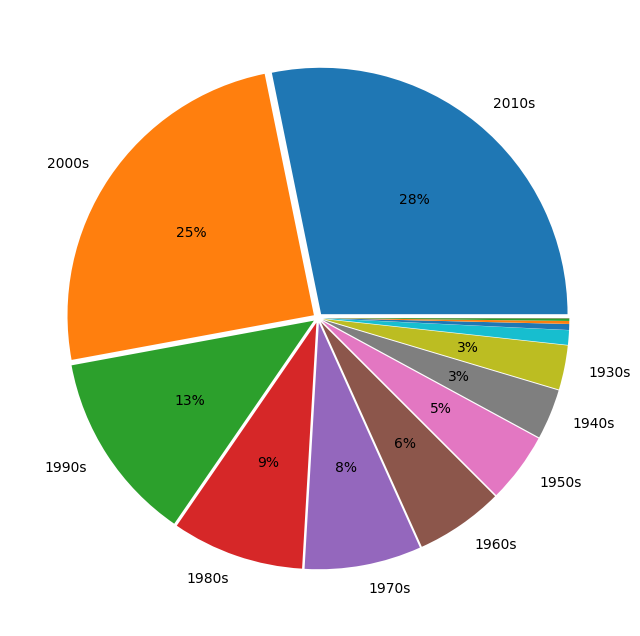

In [10]:
def count_pie(series):
    counts = series.value_counts()
    counts /= counts.sum()
    labels = ['' if num < 0.01 else str(year) for (year,num) in counts.items()]
    f, ax = plt.subplots(figsize=(8, 8))
    explode = [0.02 if counts.iloc[i] < 100 else 0.001 for i in range(counts.size)]
    plt.pie(counts, labels=labels, autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '', explode=explode)
    plt.show()
    return counts

movies_df.dropna(subset=['release_date'], inplace=True)
extract_decade = lambda x: str(int(x[:4]) // 10 * 10) + 's'
movies_df['decade'] = movies_df['release_date'].apply(extract_decade)
result = count_pie(movies_df['decade'])
result = result.round(3)


### *Genre Exploration*


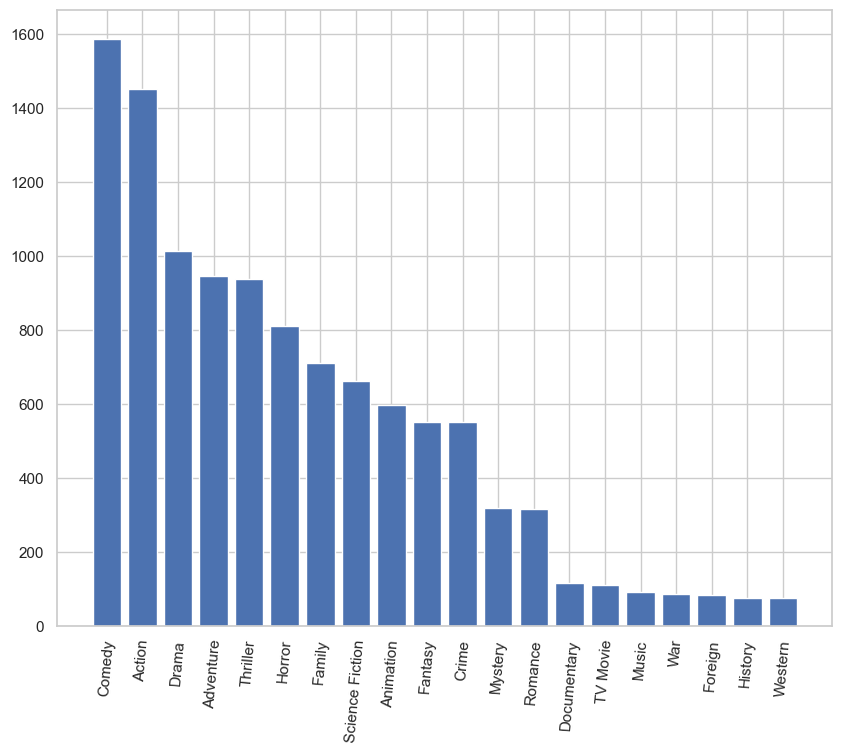

In [11]:
series = movies.genres
sns.set(style='whitegrid')

total_genres = []
for genre in series:
    total_genres.extend(genre)

unique_genres = list(set(total_genres))

values1 =[]
for genre in unique_genres:
    count = total_genres.count(genre)
    values1.append((genre,count))
values1.sort(key=lambda x:x[1],reverse=True)

dict = {}
for item in values1[:30]:
    dict[item[0]] = item[1]

plt.subplots(figsize=(10,8))
plt.xticks(rotation=85)
plt.bar(dict.keys(),dict.values(),align='center')
plt.show()

### *Finding Numerical Correlations*


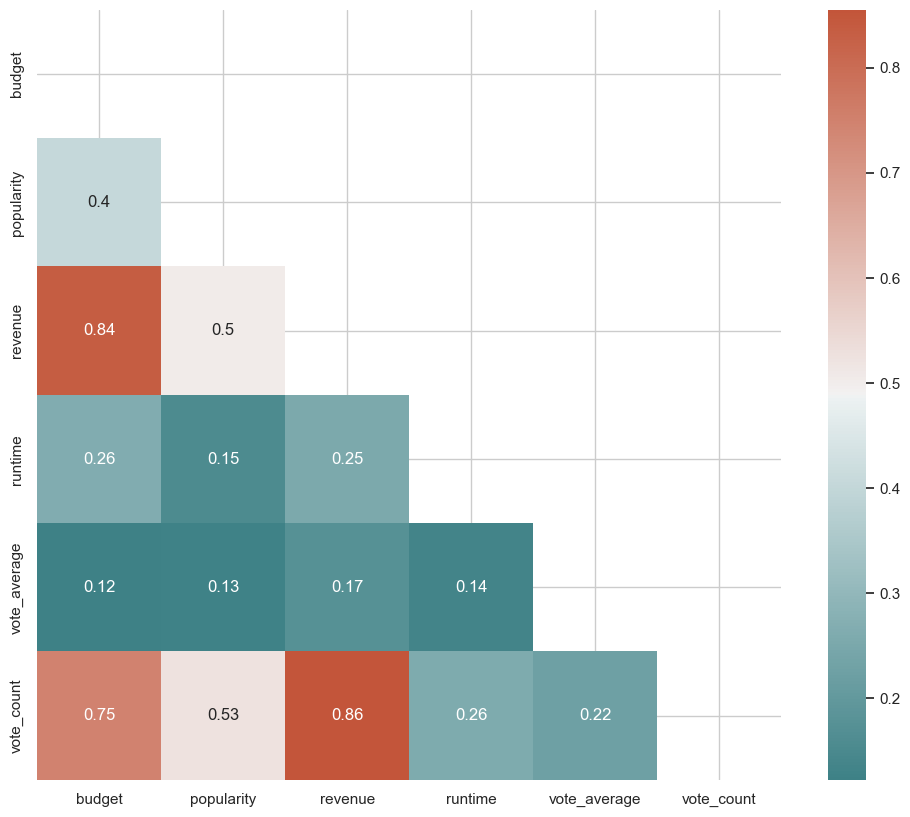

In [12]:
numeric_columns = movies[['budget','popularity','revenue','runtime','vote_average','vote_count']]

correlation = numeric_columns.corr()
plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(correlation,dtype=bool))
cmap = sns.diverging_palette(200,20,as_cmap=True)
sns.heatmap(correlation,annot=True,mask=mask,cmap=cmap)
plt.show()

### *Getting Features Columns*


In [13]:
columns_to_combine = ['genres','cast','crew']
movies['feature'] = movies.apply(combine_all_features(columns_to_combine),axis=1)


In [14]:
indices = pd.Series(movies.index,index=movies['title']).drop_duplicates()

### *Exploring movie Recommendation with TF - IDF*


In [15]:
title = 'Toy Story'
movie_index = indices[title]

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies[ 'feature'])
cosine_sin_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)
similarity_scores = list(enumerate(cosine_sin_tfidf[movie_index]))
similarity_scores_sorted = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
similar_movies = similarity_scores_sorted[1:11]
movie_indices = [index for index, _ in similar_movies]

recommend1 = movies.iloc[movie_indices]["title"]                                                                                                   
recommend1                                

3008                                Toy Story 2
7221     Agent Cody Banks 2: Destination London
15413                               Toy Story 3
11094           Garfield: A Tail of Two Kitties
26331                              Voodoo Tiger
7761                                   Garfield
8282            The SpongeBob SquarePants Movie
7037                       Cheaper by the Dozen
4914                            Another 48 Hrs.
3414                                     Arthur
Name: title, dtype: object

### *Exploring movie Recommendation with CountVectorizer*


In [17]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['feature'])
cosine_sin_count = cosine_similarity(count_matrix, count_matrix)
similarity_scores = list(enumerate(cosine_sin_count[movie_index]))
similarity_scores_sorted = sorted(similarity_scores,key=lambda x: x[1], reverse=True)
similar_movies = similarity_scores_sorted[1:11]
movie_indices = [index for index, _ in similar_movies]

recommend2 = movies.iloc[movie_indices]['title']
recommend2

3008                                Toy Story 2
26331                              Voodoo Tiger
7221     Agent Cody Banks 2: Destination London
3414                                     Arthur
4422              The Return of the Living Dead
4914                            Another 48 Hrs.
9773                           The ChubbChubbs!
15413                               Toy Story 3
40024                    Love's Unending Legacy
10644                                     Havoc
Name: title, dtype: object

# Exporting Model

In [18]:
data = movies_df[['id', 'title']]

In [19]:
pickle.dump(data,open('movies.pkl','wb'))

In [20]:
import gzip

with gzip.open('similarity.pkl.gz', 'wb') as f:
    pickle.dump(cosine_sin_count, f)